In [62]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [63]:
crime = pd.read_csv("crime_data.csv")

In [64]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [65]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [66]:
crime[crime.duplicated()]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape


In [67]:
crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [68]:
crime.drop(['Unnamed: 0'],axis=1,inplace=True)


In [69]:
crime.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [70]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [71]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [72]:
# Normalized data frame (considering the numerical part of data)
crime_norm = norm_func(crime)
crime_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


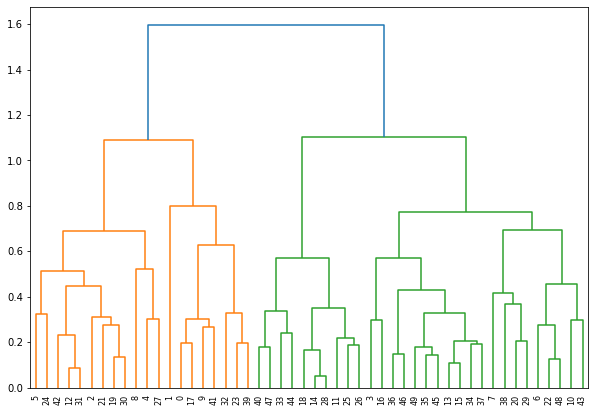

In [13]:
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(crime_norm,'complete'))

In [14]:
hclusters=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
hclusters

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [73]:
y=pd.DataFrame(hclusters.fit_predict(crime_norm),columns=['clustersid'])
y['clustersid'].value_counts()

1    20
3    12
2    10
0     8
Name: clustersid, dtype: int64

In [74]:
crime['clustersid']=hclusters.labels_ #Adding Clusters to Dataset
crime

,Murder,Assault,UrbanPop,Rape,clustersid
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,3
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,3
9,17.4,211,60,25.8,0


In [75]:
crime.groupby('clustersid').mean()

,Murder,Assault,UrbanPop,Rape
clustersid,,,,
0,14.087500,252.750000,53.500000,24.5375
1,5.715000,132.300000,70.800000,18.1000
2,3.180000,78.700000,49.300000,11.6300
3,10.883333,256.916667,78.333333,32.2500


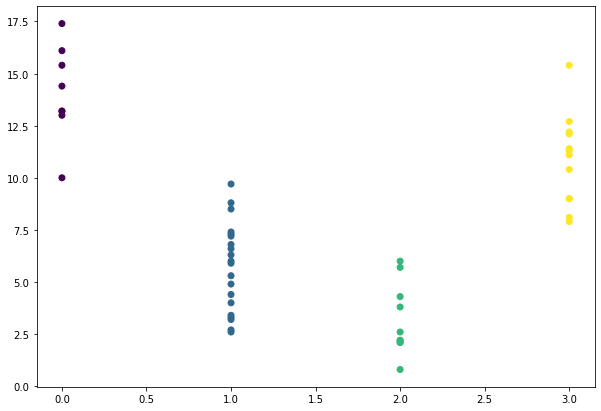

In [76]:
plt.figure(figsize=(10, 7))  
plt.scatter(crime['clustersid'],crime['Murder'], c=hclusters.labels_) 

### K Means Clustering

In [77]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [78]:
crime_norm # taking normalized values

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


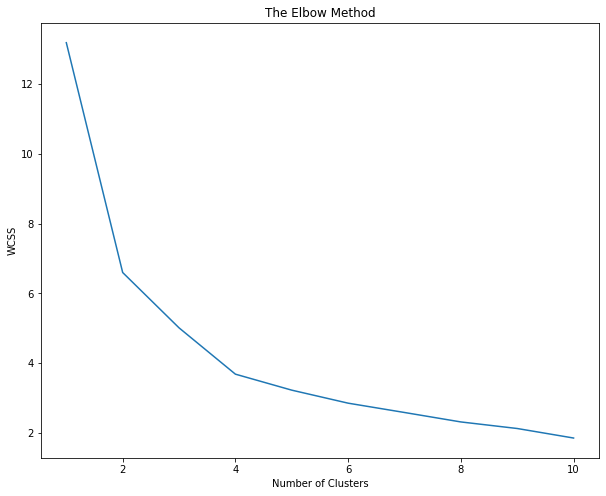

In [59]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    clf.fit(crime_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS

plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [79]:
# Selecting 4 clusters from the above elbow curve plot which is the optimum number of clusters 
model = KMeans(n_clusters=4)
model.fit(crime_norm)
model.labels_
crime

,Murder,Assault,UrbanPop,Rape,clustersid
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,3
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,3
9,17.4,211,60,25.8,0


In [80]:
md = pd.Series(model.labels_)  # converting numpy array into pandas series object 
crime['clustersKMeans'] = md          
crime

,Murder,Assault,UrbanPop,Rape,clustersid,clustersKMeans
0,13.2,236,58,21.2,0,2
1,10.0,263,48,44.5,0,3
2,8.1,294,80,31.0,3,3
3,8.8,190,50,19.5,1,2
4,9.0,276,91,40.6,3,3
5,7.9,204,78,38.7,3,3
6,3.3,110,77,11.1,1,1
7,5.9,238,72,15.8,1,1
8,15.4,335,80,31.9,3,3
9,17.4,211,60,25.8,0,2


In [82]:
crime.groupby(crime.clustersKMeans).mean()

,Murder,Assault,UrbanPop,Rape,clustersid
clustersKMeans,,,,,
0,3.600000,78.538462,52.076923,12.176923,1.769231
1,5.852941,141.176471,73.647059,19.335294,1.117647
2,13.937500,243.625000,53.750000,21.412500,0.125000
3,10.966667,264.000000,76.500000,33.608333,2.750000


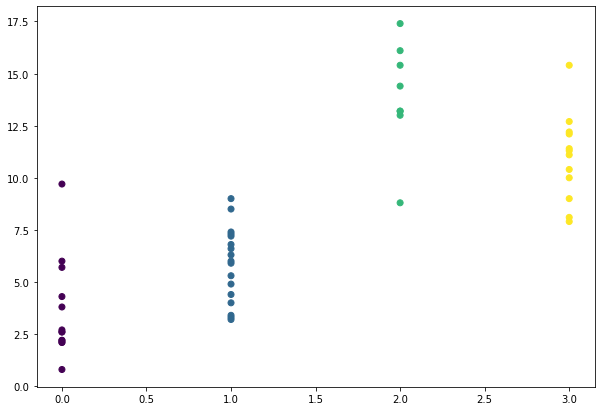

In [83]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime['clustersKMeans'],crime['Murder'], c=model.labels_)

### DBSCAN

In [38]:
# Import Libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN

In [39]:
crime_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [84]:
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(crime_norm)

DBSCAN(eps=1, min_samples=4)

In [85]:
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [88]:
ml=pd.Series(dbscan.labels_)
crime["clustersdbscan"]=ml
crime

,Murder,Assault,UrbanPop,Rape,clustersid,clustersKMeans,clustersdbscan
0,13.2,236,58,21.2,0,2,0
1,10.0,263,48,44.5,0,3,0
2,8.1,294,80,31.0,3,3,0
3,8.8,190,50,19.5,1,2,0
4,9.0,276,91,40.6,3,3,0
5,7.9,204,78,38.7,3,3,0
6,3.3,110,77,11.1,1,1,0
7,5.9,238,72,15.8,1,1,0
8,15.4,335,80,31.9,3,3,0
9,17.4,211,60,25.8,0,2,0


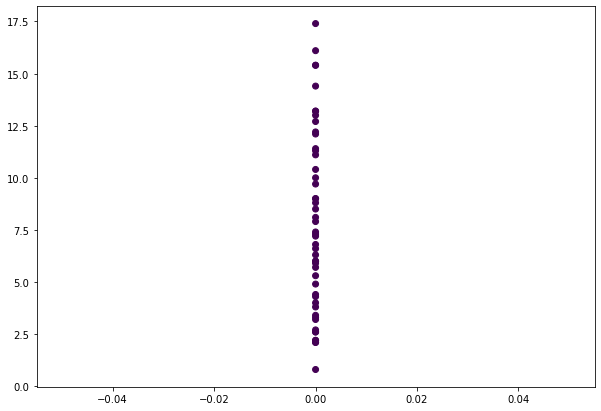

In [89]:
plt.figure(figsize=(10, 7))  
plt.scatter(crime['clustersdbscan'],crime['Murder'], c=dbscan.labels_) 